In [1]:
from IPython.display import display
import pandas as pd
import json
from tqdm import tqdm
def Vega(spec):
    bundle = {}
    bundle['application/vnd.vega.v5+json'] = spec
    display(bundle, raw=True)

def VegaLite(spec):
    bundle = {}
    bundle['application/vnd.vegalite.v4+json'] = spec
    display(bundle, raw=True)
    
from vega import VegaLite

In [7]:
x_bar_data = [{'num_agg_select': 0, 'count': 672},
 {'num_agg_select': 1, 'count': 334},
 {'num_agg_select': 2, 'count': 26},
 {'num_agg_select': 3, 'count': 2}]

In [8]:
y_bar_data = [{'has_distinct': 0, 'count': 949}, {'has_distinct': 1, 'count': 85}]

In [9]:
heatmap_data = [{'num_agg_select': 0, 'has_distinct': 0, 'count': 624},
 {'num_agg_select': 0, 'has_distinct': 1, 'count': 48},
 {'num_agg_select': 1, 'has_distinct': 0, 'count': 299},
 {'num_agg_select': 1, 'has_distinct': 1, 'count': 35},
 {'num_agg_select': 2, 'has_distinct': 0, 'count': 24},
 {'num_agg_select': 2, 'has_distinct': 1, 'count': 2},
 {'num_agg_select': 3, 'has_distinct': 0, 'count': 2}]

In [11]:
x, y =    'num_agg_select', 'has_distinct'
x_label =  '#-AGG in SELECT'
y_label =  '#-Distinct'

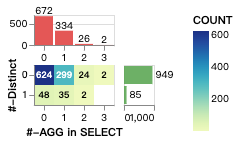

In [12]:
VegaLite({
    "$schema":
    "https://vega.github.io/schema/vega-lite/v4.json",
    "spacing": 20,
    "bounds": "flush",
    "vconcat": [
    {
        "data": {
            "values": x_bar_data
        },
         "height": 30,
        "encoding": {
            "x": {
                "field": x,
                "type": 'nominal',
#                 "sort": ["B", 'P', 'L', 'S', 'SB', 'GL', 'GB', 'GS'],
                'title': '',
                "axis":{
                    'labelAngle': 0,
                }
            },
            "y": {
                "aggregate": "sum",
                "field": "count",
                "title": "",
#                 "scale": {"domain": [0, 100]}
            }
        },
        "layer":[
            {"mark": {
                "type": "bar",
                "color": "#e45756",
                "opacity": 1
            }},
            {
                    "mark": {
                      "type": "text",
                      "align": "center",
                      "baseline": "top",
                      "dy": -10,
                     "fontSize":10
                    },
                    "encoding": {
                      "text": {"field": "count", "type": "quantitative"}
                    }
                }
        ]
    },
    {
        "spacing": 10,
        "bounds": "flush",
        "hconcat": [
            {"data": {
                "values": heatmap_data
            },
                "encoding": {
                "y": {
                    "field": y,
                    "type": "ordinal",
                    "title": y_label,
#                     "sort": ["Easy", "Medium", "Hard", "Extra Hard", 'All'],
                    "axis":{
                        'labelFont': 'Helvetica',
                        'labelFontSize': 10
                    }
                },
                "x": {
                    "field": x,
                    "type": "ordinal",
                    "title": x_label,
#                     "sort": ["B", 'P', 'L', 'S', 'SB', 'GL', 'GB', 'GS', 'All'],
                    "axis":{
                        'labelAngle': 0,
                    }
                }
            },
                "layer": [{
                    "mark": "rect",
                    "encoding": {
                        "color": {
                            "field": "count",
                            "type": "quantitative",
                            "title": "COUNT",
                            "legend": {
                                "direction": "vertical",
                                "gradientLength": 100,
                            },
                        }
                    }
                },
                {
                    "mark": {
                        "type": "text",
                        "fontSize": 9,
                        "fontWeight": 'bold'
                    },
                    "encoding": {
                        "text": {
                            "field": "count",
                            "type": "quantitative"
                        },
                        "color": {
                            "condition": {
                                "test": "datum['count'] < 200",
                                "value": "black"
                            },
                            "value": "white"
                        }
                    }
                }],
                "config": {
                "axis": {
                    "grid": True,
                    "tickBand": "extent"
                },
                "legend": {
                    "gradientLabelLimit": 100
                }
            }
            },
            {
                "data": {
                    "values": y_bar_data
                },

                "width": 30,
                "encoding": {
                    "y": {
                        "field":y,
                        "type": 'nominal',
#                         "sort": ["Easy", "Medium", "Hard", "Extra Hard", 'All'],
                        'title': '',
                        "axis":''
                    },
                    "x": {
                        "aggregate": "sum",
                        "field": "count",
                        "title": "",
#                         "scale": {"domain": [0, 1100]}
                    }
                },
                "layer":[
                    {"mark": {
                    "type": "bar",
                    "color": "#54a24b",
                    "opacity": 0.85
                }},
                    {
                    "mark": {
                      "type": "text",
                      "align": "left",
                      "baseline": "middle",
                      "dx": 3,
                        "fontSize":10
                    },
                    "encoding": {
                      "text": {"field": "count", "type": "quantitative"}
                    }
                }
                ]
            }
        ]}]
})